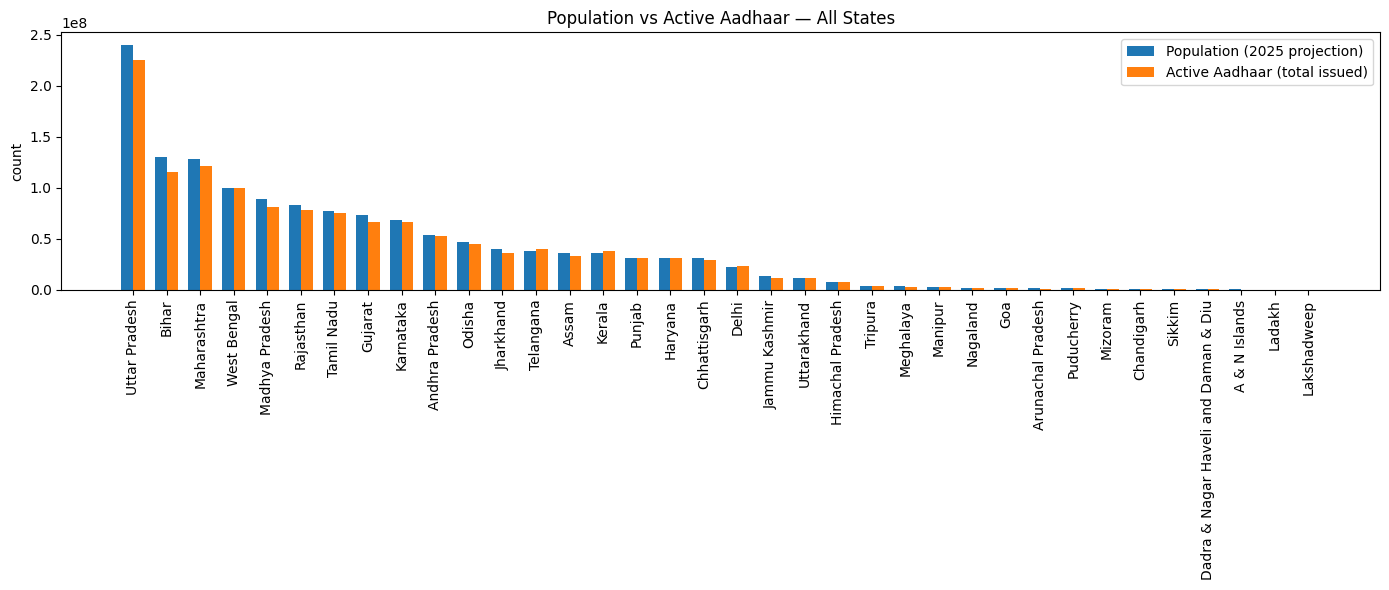

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------- load data ----------------
raw=pd.read_excel("../sql/data/AadhaarSaturationReport.xlsx",header=None)

df=raw.iloc[5:41].copy()
df.columns=["sno","state","population","aadhaar_assigned","penetration_ratio"]

# clean numbers
df["population"]=(
    df["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

df["aadhaar_assigned"]=(
    df["aadhaar_assigned"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

# sort by population (ALL STATES kept)
df=df.sort_values("population",ascending=False)

# ---------------- plot ----------------
x=np.arange(len(df))
width=0.35

plt.figure(figsize=(14,6))

plt.bar(
    x - width/2,
    df["population"],
    width,
    color="tab:blue",
    label="Population (2025 projection)"
)

plt.bar(
    x + width/2,
    df["aadhaar_assigned"],
    width,
    color="tab:orange",
    label="Active Aadhaar (total issued)"
)

plt.xticks(x,df["state"],rotation=90)
plt.ylabel("count")

plt.title("Population vs Active Aadhaar — All States")
plt.legend()
plt.tight_layout()
plt.show()
